In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download denizkavi1/brain-tumor

 99% 696M/700M [00:15<00:00, 66.9MB/s]
100% 700M/700M [00:15<00:00, 47.5MB/s]


In [7]:
import os
import zipfile

local_zip = '/content/brain-tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/brain-tumor')
zip_ref.close()

In [8]:
check_dir = "/tmp/brain-tumor"
print(os.listdir(check_dir))

['2', '3', '1']


In [9]:
!pip install split_folders
import splitfolders

src = "/tmp/brain-tumor"
base_dir = '/content/brain-tumor/model_brain_tumor'

splitfolders.ratio(src, output = base_dir, seed=1337, ratio=(0.7,0.3))

Copying files: 3064 files [00:02, 1362.27 files/s]


In [10]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

meningioma_training_dir = os.path.join(train_dir, '1')
glioma_training_dir = os.path.join(train_dir, '2')
pituitary_training_dir = os.path.join(train_dir, '3')

meningioma_validation_dir = os.path.join(validation_dir, '1')
glioma_validation_dir = os.path.join(validation_dir, '2')
pituitary_validation_dir = os.path.join(validation_dir, '3')

In [11]:
print(os.listdir(meningioma_training_dir)[:10])
print(os.listdir(glioma_training_dir)[:10])
print(os.listdir(pituitary_training_dir)[:10])

print('')
print('total training meningioma images :', len(os.listdir(meningioma_training_dir)))
print('total training glioma images:', len(os.listdir(glioma_training_dir)))
print('total training pituitary images:', len(os.listdir(pituitary_training_dir)))
print('total validation meningioma images:', len(os.listdir(meningioma_validation_dir)))
print('total validation glioma images:', len(os.listdir(glioma_validation_dir)))
print('total validation pituitary images:', len(os.listdir(pituitary_validation_dir)))

['2815.png', '2915.png', '3049.png', '2851.png', '2535.png', '2809.png', '2359.png', '2886.png', '2522.png', '2619.png']
['653.png', '768.png', '791.png', '299.png', '1106.png', '893.png', '897.png', '312.png', '398.png', '1113.png']
['2138.png', '2179.png', '2241.png', '1733.png', '2157.png', '1741.png', '1972.png', '1725.png', '1520.png', '1689.png']

total training meningioma images : 495
total training glioma images: 998
total training pituitary images: 651
total validation meningioma images: 213
total validation glioma images: 428
total validation pituitary images: 279


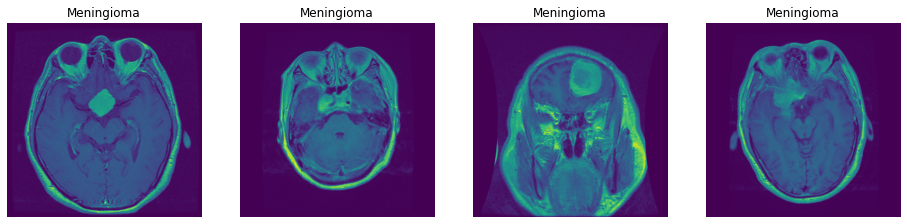

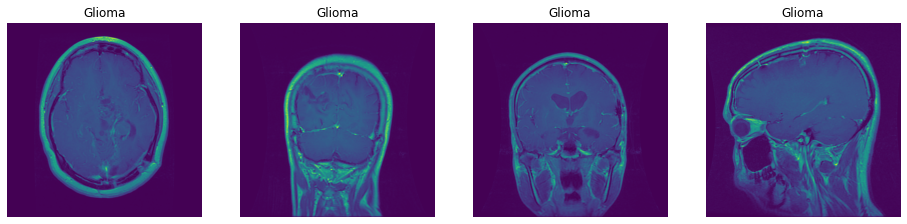

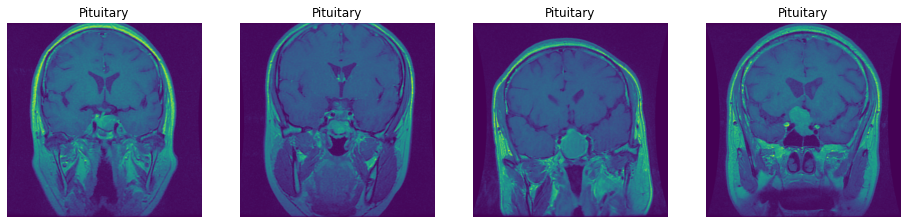

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

meningioma_image = os.listdir(meningioma_training_dir)
glioma_image = os.listdir(glioma_training_dir)
pituitary_image = os.listdir(pituitary_training_dir)

fname1 = [os.path.join(meningioma_training_dir,fname)
        for fname in meningioma_image[:4]]

fname2 = [os.path.join(glioma_training_dir,fname)
        for fname in glioma_image[:4]]

fname3 = [os.path.join(pituitary_training_dir,fname)
        for fname in pituitary_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Meningioma')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Glioma')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pituitary')
    plt.imshow(img)
    
plt.show()

In [13]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [15]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2144, 100, 100, 3)
Train Label =  (2144,)
Validation Data =  (920, 100, 100, 3)
Validation Label =  (920,)


In [16]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [84  1 68]
Data setelah di-normalisasi  [0.32941177 0.00392157 0.26666668]


In [17]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['2' '2' '2' '3' '3' '3' '3' '3' '3' '3']
Label setelah di-encoder  [1 1 1 2 2 2 2 2 2 2]


In [49]:
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras.layers import Input, InputLayer, Dense, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, AveragePooling2D

In [50]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [51]:
# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [52]:
# Print model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)            

In [53]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [54]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
108/108 [==============================] - 24s 216ms/step - loss: -26156.5410 - acc: 0.4641 - val_loss: -201037.3438 - val_acc: 0.4652
Epoch 2/100
108/108 [==============================] - 23s 210ms/step - loss: -4401861.5000 - acc: 0.4655 - val_loss: -14510427.0000 - val_acc: 0.4652
Epoch 3/100
108/108 [==============================] - 22s 206ms/step - loss: -68013968.0000 - acc: 0.4655 - val_loss: -177868960.0000 - val_acc: 0.4652
Epoch 4/100
108/108 [==============================] - 22s 208ms/step - loss: -491805984.0000 - acc: 0.4655 - val_loss: -956099072.0000 - val_acc: 0.4652
Epoch 5/100
108/108 [==============================] - 22s 206ms/step - loss: -1887467008.0000 - acc: 0.4655 - val_loss: -3217590784.0000 - val_acc: 0.4652
Epoch 6/100
108/108 [==============================] - 22s 204ms/step - loss: -5278263808.0000 - acc: 0.4655 - val_loss: -7580120576.0000 - val_acc: 0.4652
Epoch 7/100
108/108 [==============================] - 23s 210ms/step - loss: -1230

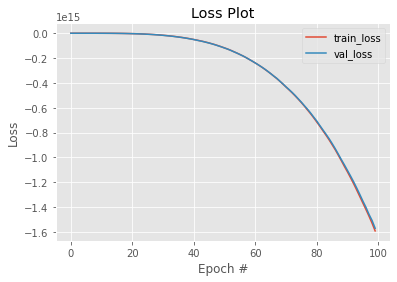

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

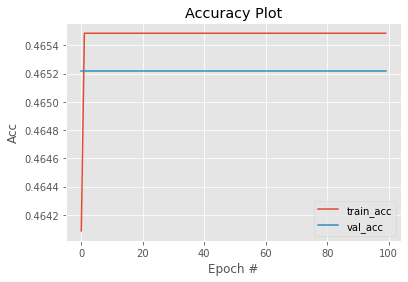

In [56]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.47      1.00      0.64       428
           2       0.00      0.00      0.00       279

    accuracy                           0.47       920
   macro avg       0.16      0.33      0.21       920
weighted avg       0.22      0.47      0.30       920



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
